In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

2. Задай куб через його вершини. Здійсни масштабування куба (збільшення, зменшення у кілька разів). Запиши відповідну матрицю.

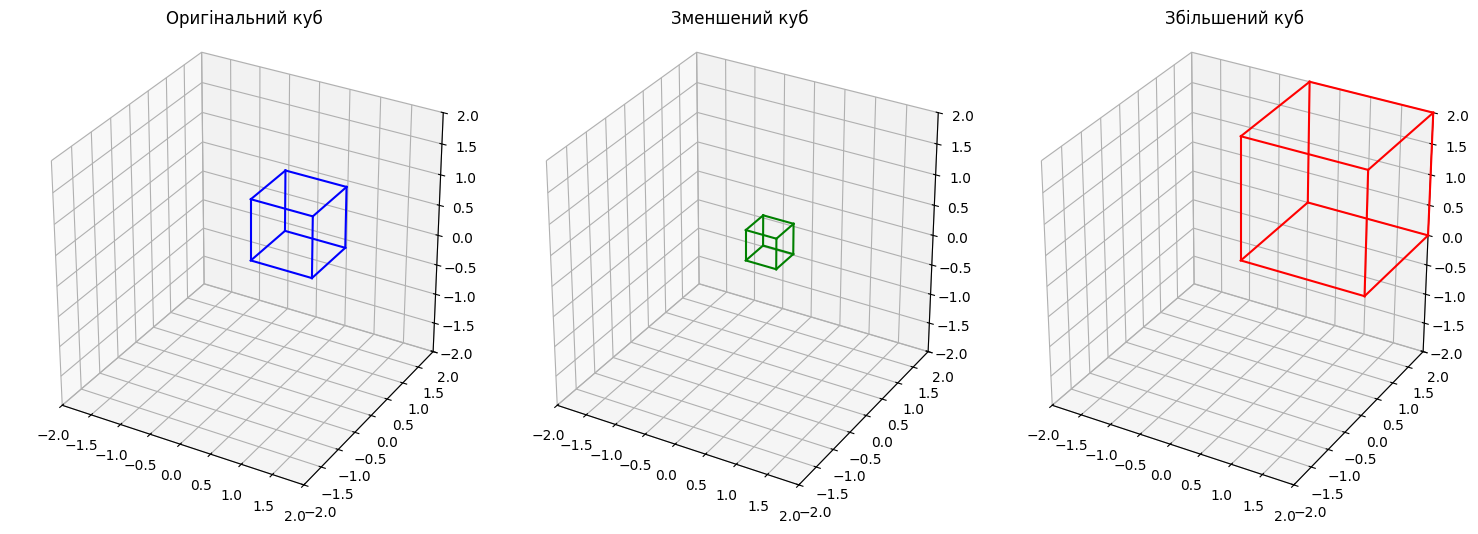

In [120]:
cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

scale_down = 0.5
scale_up = 2.0

scaling_matrix_down = np.array([
    [scale_down, 0, 0],
    [0, scale_down, 0],
    [0, 0, scale_down]
])

scaling_matrix_up = np.array([
    [scale_up, 0, 0],
    [0, scale_up, 0],
    [0, 0, scale_up]
])

scaled_down_vertices = cube_vertices @ scaling_matrix_down.T
scaled_up_vertices = cube_vertices @ scaling_matrix_up.T

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
]

fig = plt.figure(figsize=(15, 5))

def draw_cube(ax, vertices, color, title):
    for edge in edges:
        ax.plot(
            [vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]],
            color
        )
    ax.set_title(title)
    ax.set_box_aspect([1,1,1])
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])


ax1 = fig.add_subplot(131, projection='3d')
draw_cube(ax1, cube_vertices, 'b', "Оригінальний куб")

ax2 = fig.add_subplot(132, projection='3d')
draw_cube(ax2, scaled_down_vertices, 'g', "Зменшений куб")

ax3 = fig.add_subplot(133, projection='3d')
draw_cube(ax3, scaled_up_vertices, 'r', "Збільшений куб")

plt.tight_layout()
plt.show()


3. Отриманий результат з попереднього пункту симетрично відобрази
відносно початку координат, відносно однієї з координатних площин у
тривимірній декартовій системі координат (простір).

4. Задай пряму як у прикладі 1 даної лабораторної роботи. Здійсни поворот куба відносно прямої на деякий кут φ. Вкажи перетворення, які необхідні для одержання такого результату.

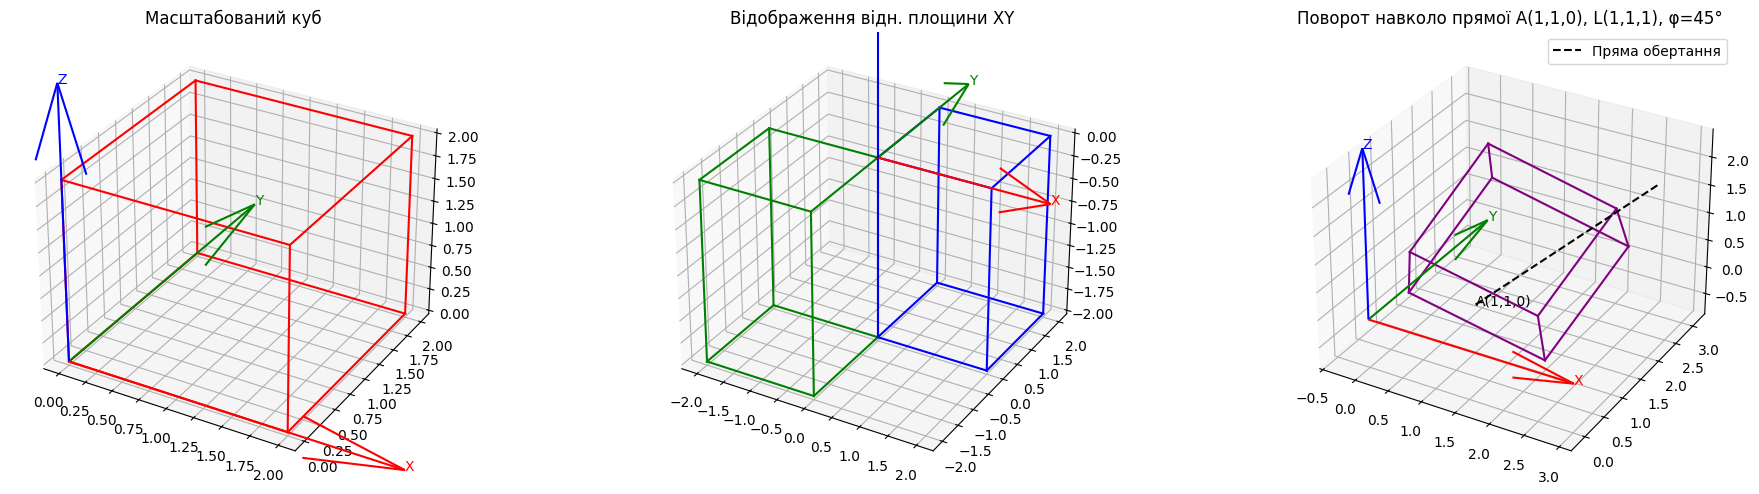

In [121]:
scale_matrix = np.diag([2, 2, 2])
scaled_vertices = vertices @ scale_matrix.T

reflection_origin = np.diag([-1, -1, -1])
reflection_xy = np.diag([1, 1, -1])
reflected_origin = scaled_vertices @ reflection_origin.T
reflected_xy = scaled_vertices @ reflection_xy.T

A = np.array([1, 1, 0])
L = np.array([1, 1, 1])   
L = L / np.linalg.norm(L)
l, m, n = L
phi = np.pi / 4

T1 = np.eye(4)
T1[:3, 3] = -A

cos_psi = n / np.sqrt(m**2 + n**2)
sin_psi = m / np.sqrt(m**2 + n**2)
R_x = np.array([
    [1, 0, 0, 0],
    [0, cos_psi, -sin_psi, 0],
    [0, sin_psi, cos_psi, 0],
    [0, 0, 0, 1]
])

d = np.sqrt(m**2 + n**2)
cos_theta = d
sin_theta = l
R_y = np.array([
    [cos_theta, 0, sin_theta, 0],
    [0, 1, 0, 0],
    [-sin_theta, 0, cos_theta, 0],
    [0, 0, 0, 1]
])

cos_phi = np.cos(phi)
sin_phi = np.sin(phi)
R_z = np.array([
    [cos_phi, -sin_phi, 0, 0],
    [sin_phi, cos_phi, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

R_y_inv = R_y.T
R_x_inv = R_x.T
T2 = np.eye(4)
T2[:3, 3] = A

M_affine = T2 @ R_x_inv @ R_y_inv @ R_z @ R_y @ R_x @ T1

hom_vertices = np.hstack((scaled_vertices, np.ones((8, 1))))
rotated_vertices = (M_affine @ hom_vertices.T).T[:, :3]

def draw_cube(ax, verts, color, label=None):
    for edge in edges:
        ax.plot(
            [verts[edge[0]][0], verts[edge[1]][0]],
            [verts[edge[0]][1], verts[edge[1]][1]],
            [verts[edge[0]][2], verts[edge[1]][2]],
            color=color
        )
    if label:
        ax.set_title(label)

def draw_axes(ax, length=3):
    ax.quiver(0, 0, 0, length, 0, 0, color='r')
    ax.text(length, 0, 0, 'X', color='r')
    ax.quiver(0, 0, 0, 0, length, 0, color='g')
    ax.text(0, length, 0, 'Y', color='g')
    ax.quiver(0, 0, 0, 0, 0, length, color='b')
    ax.text(0, 0, length, 'Z', color='b')

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, projection='3d')
draw_cube(ax1, scaled_vertices, 'r', "Масштабований куб")
draw_axes(ax1)

ax2 = fig.add_subplot(132, projection='3d')
draw_cube(ax2, reflected_origin, 'g', "Відображення відн. початку")
draw_cube(ax2, reflected_xy, 'b', "Відображення відн. площини XY")
draw_axes(ax2)

ax3 = fig.add_subplot(133, projection='3d')
draw_cube(ax3, rotated_vertices, 'purple', "Поворот навколо прямої A(1,1,0), L(1,1,1), φ=45°")
draw_axes(ax3)

line_dir = L * 3
ax3.plot(
    [A[0], A[0] + line_dir[0]],
    [A[1], A[1] + line_dir[1]],
    [A[2], A[2] + line_dir[2]],
    'k--', label="Пряма обертання"
)
ax3.text(*A, 'A(1,1,0)', color='black')
ax3.legend()

plt.tight_layout()
plt.show()


8.Навести алгоритм з математичними перетвореннями для побудови симетрії відносно площини на основі знань з аналітичної геометрії. Порівняти результати 

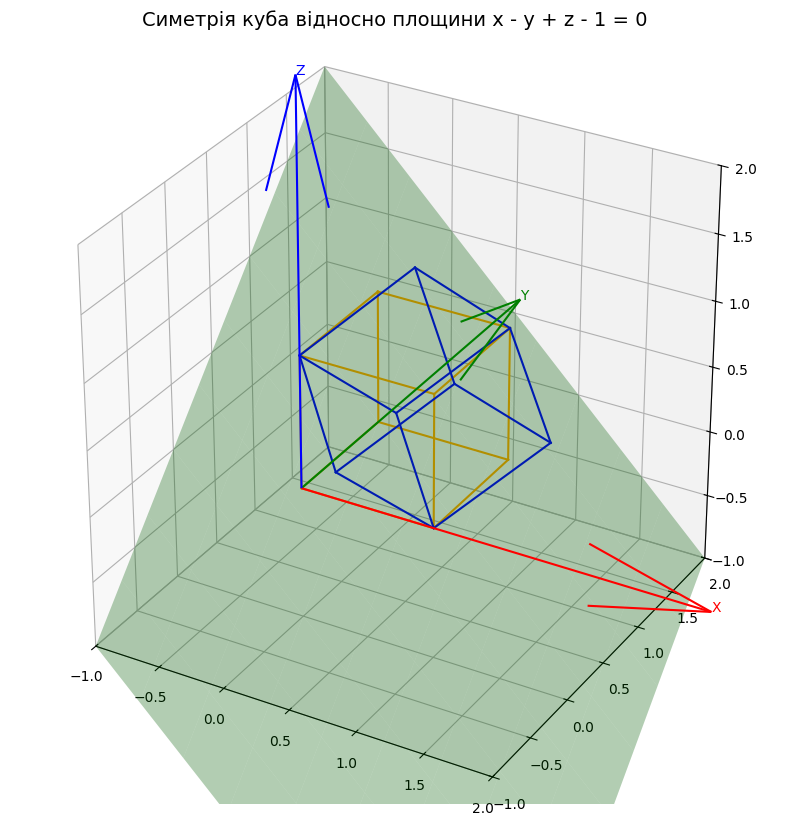

In [122]:
A, B, C, D = 1, -1, 1, -1  

n = np.array([A, B, C])
n_norm_sq = np.dot(n, n)

point_on_plane = np.array([1, 1, 1]) 

reflected_vertices = []
for v in vertices:
    diff = v - point_on_plane
    projection_len = 2 * np.dot(diff, n) / n_norm_sq
    reflection = v - projection_len * n
    reflected_vertices.append(reflection)
reflected_vertices = np.array(reflected_vertices)

fig = plt.figure(figsize=(16, 10))  
ax = fig.add_subplot(111, projection='3d')


draw_axes(ax)
draw_cube(ax, vertices, 'orange', 'О')
draw_cube(ax, reflected_vertices, 'blue', 'В')

xx, yy = np.meshgrid(np.linspace(-1, 2, 10), np.linspace(-1, 2, 10))
zz = (D - A * xx - B * yy) / C
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_zlim(-1, 2)

ax.set_box_aspect([1, 1, 1])
ax.set_title("Симетрія куба відносно площини x - y + z - 1 = 0", fontsize=14)

plt.show()


5. Задай площину, здійснити симетрію куба відносно площини.

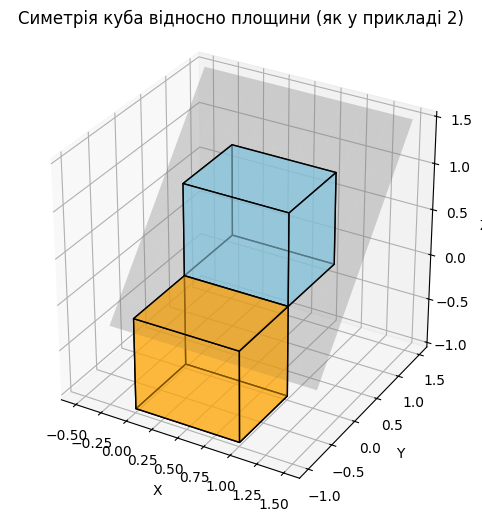

In [123]:
cube = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
])

P1 = np.array([0, 0, 0])
P2 = np.array([1, 0, 0])
P3 = np.array([0, 1, 1])

u = P2 - P1
v = P3 - P1
n = np.cross(u, v); n = n / np.linalg.norm(n)
x_axis = u / np.linalg.norm(u)
z_axis = n
y_axis = np.cross(z_axis, x_axis)

R = np.vstack([x_axis, y_axis, z_axis]).T
R4 = np.eye(4)
R4[:3, :3] = R

Mz = np.diag([1, 1, -1, 1])

R4_inv = np.eye(4)
R4_inv[:3, :3] = R.T

M = R4_inv @ Mz @ R4

def to_hom(v): return np.append(v, 1)
reflected = np.array([M @ to_hom(p) for p in cube])[:, :3]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

faces = [[0,1,2,3],[4,5,6,7],[0,1,5,4],
         [2,3,7,6],[1,2,6,5],[4,7,3,0]]

def draw_cube(verts, color, alpha):
    for face in faces:
        ax.add_collection3d(Poly3DCollection([verts[face]], facecolors=color, edgecolors='k', alpha=alpha))

draw_cube(cube, 'skyblue', 0.5)
draw_cube(reflected, 'orange', 0.5)




A, B, C = n
D = -np.dot(n, P1)
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 10), np.linspace(-0.5, 1.5, 10))
zz = (-A * xx - B * yy - D) / C
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Симетрія куба відносно площини (як у прикладі 2)')
ax.set_box_aspect([1,1,1])
plt.show()


6,7.
Запропонувати інший набір перетворень для отримання результатів, які наведені у прикладі 2 даної
лабораторної роботи. Тобто здійснити інші перетворення за загальним
підходом (симетрія, поворот, перенесення), показати їх математично.

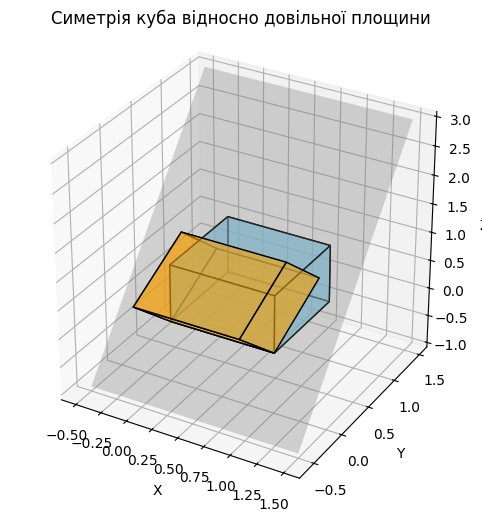

In [124]:
P1 = np.array([0, 0, 0])
P2 = np.array([2, 0, 0])
P3 = np.array([2, 1, 2])

cube_vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

v1 = P2 - P1
v2 = P3 - P1
normal = np.cross(v1, v2)
normal = normal / np.linalg.norm(normal) 

A, B, C = normal
D = -np.dot(normal, P1)

def reflect_point(point, A, B, C, D):
    x, y, z = point
    d = (A*x + B*y + C*z + D) / (A**2 + B**2 + C**2)
    x_ref = x - 2 * A * d
    y_ref = y - 2 * B * d
    z_ref = z - 2 * C * d
    return np.array([x_ref, y_ref, z_ref])

reflected_vertices = np.array([reflect_point(v, A, B, C, D) for v in cube_vertices])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

faces = [[0,1,2,3], [4,5,6,7], [0,1,5,4],
         [2,3,7,6], [1,2,6,5], [4,7,3,0]]

def draw_cube(vertices, color, alpha):
    for face in faces:
        ax.add_collection3d(Poly3DCollection(
            [vertices[face]], facecolors=color, linewidths=1, edgecolors='k', alpha=alpha))

draw_cube(cube_vertices, color='skyblue', alpha=0.5)
draw_cube(reflected_vertices, color='orange', alpha=0.5)

xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 10), np.linspace(-0.5, 1.5, 10))
zz = (-A * xx - B * yy - D) / C
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Симетрія куба відносно довільної площини')
ax.set_box_aspect([1,1,1])
plt.show()


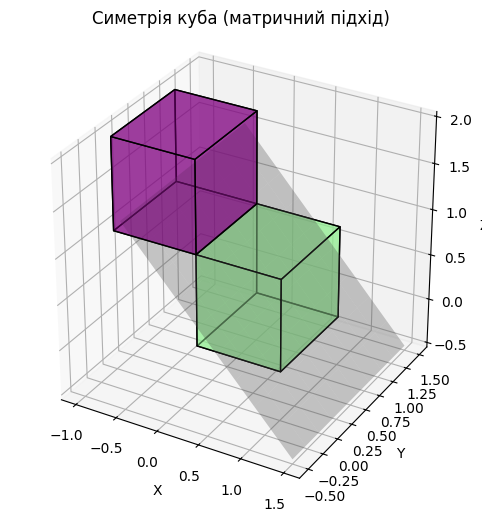

In [125]:
cube = np.array([
    [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
    [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]
])

P1 = np.array([0, 0, 1])
P2 = np.array([1, 0, 0])
P3 = np.array([0, 1, 1])

v1 = P2 - P1
v2 = P3 - P1
normal = np.cross(v1, v2)
normal = normal / np.linalg.norm(normal)
z_axis = normal
x_axis = v1 / np.linalg.norm(v1)
y_axis = np.cross(z_axis, x_axis)
y_axis = y_axis / np.linalg.norm(y_axis)

R = np.vstack([x_axis, y_axis, z_axis]).T
R_inv = np.linalg.inv(R)

T = np.eye(4)
T[:3, 3] = -P1

T_inv = np.eye(4)
T_inv[:3, 3] = P1

R4 = np.eye(4)
R4[:3, :3] = R

R4_inv = np.eye(4)
R4_inv[:3, :3] = R_inv

Mz = np.diag([1, 1, -1, 1])

M = T_inv @ R4_inv @ Mz @ R4 @ T

def to_homogeneous(v):
    return np.hstack([v, [1]])

reflected = np.array([M @ to_homogeneous(v) for v in cube])[:, :3]





fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

faces = [[0,1,2,3], [4,5,6,7], [0,1,5,4],
         [2,3,7,6], [1,2,6,5], [4,7,3,0]]

def draw(vertices, color, alpha):
    for face in faces:
        ax.add_collection3d(Poly3DCollection([vertices[face]], facecolors=color, edgecolors='k', alpha=alpha))

draw(cube, 'lightgreen', 0.5)
draw(reflected, 'purple', 0.5)




A, B, C = normal
D = -np.dot(normal, P1)
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 10), np.linspace(-0.5, 1.5, 10))
zz = (-A * xx - B * yy - D) / C
ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("Симетрія куба (матричний підхід)")
ax.set_box_aspect([1,1,1])
plt.show()


10.Взяти той самий куб, який був поданий у попередніх
пунктах. Здійснити ортогональне проектування даного кубу на площину
загального виду, яка не паралельна жодній з координатних площин. Вказати
відповідні математичні перетворення, розробити відповідне програмне
забезпечення.

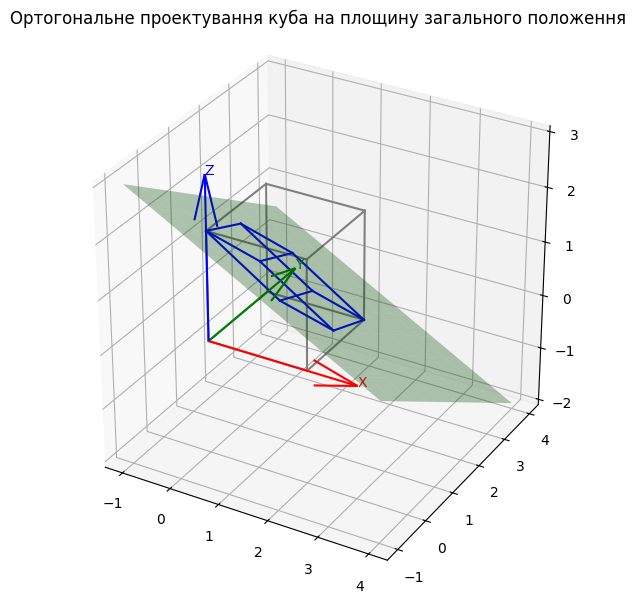

In [126]:
scale_matrix = np.diag([2, 2, 2])
scaled_vertices = vertices @ scale_matrix.T

P0 = np.array([1, 1, 1])   
n = np.array([1, 1, 2])         

def project_point_to_plane(v, P0, n):
    return v - np.dot(v - P0, n) / np.dot(n, n) * n

projected_vertices = np.array([project_point_to_plane(v, P0, n) for v in scaled_vertices])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    ax.plot(
        [scaled_vertices[edge[0]][0], scaled_vertices[edge[1]][0]],
        [scaled_vertices[edge[0]][1], scaled_vertices[edge[1]][1]],
        [scaled_vertices[edge[0]][2], scaled_vertices[edge[1]][2]],
        'gray'
    )

for edge in edges:
    ax.plot(
        [projected_vertices[edge[0]][0], projected_vertices[edge[1]][0]],
        [projected_vertices[edge[0]][1], projected_vertices[edge[1]][1]],
        [projected_vertices[edge[0]][2], projected_vertices[edge[1]][2]],
        'blue'
    )

plane_range = np.linspace(-1, 4, 10)
xx, yy = np.meshgrid(plane_range, plane_range)

a, b, c = n
d = -np.dot(n, P0)
zz = (-a * xx - b * yy - d) / c

ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

draw_axes(ax)

ax.set_title("Ортогональне проектування куба на площину загального положення")
ax.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()
